M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 2: Acoustic Feature Extraction

(110 points)

**Due Date : This assignment is due by 12:59PM (before the class starts), September 22 (Tuesday)**



---

Assignment

Each assignment is composed of two parts: a) in the theory part, you are required to solve the problem set, write down your answers on paper (also, typing your answers using PC or tablet PC is fine), and upload the scanned version (name_hw2.pdf) via **ETL**; b) for the lab assignment, you will need to write Notebook scripts and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.



# Theory (30pts)



---


1.   Linear predictive coding (30 pts)




Consider a signal $ x(n) $ given by


$$ x(n) = [1,-1,0,1,0,-1,1,1] $$


Given two linear predictive coefficients with order 3 and 5 specified by $ A_1 = [-0.17,-0.5,0.17] $  and $ A_2 = [-0.21, -0.38, 0.21, 0.25, 0.01] $ , respectively,


*   a. Find $ \hat{x}_1(n) $ and $ \hat{x}_2(n) $   (Hint: you’ll need to fill in zeros to predict the first few samples).
*   b. Compute the residual errors $ e_1(n) $ and $ e_2(n) $.
*   c. Compute the mean square errors (MSE). The MSE is given by


$$ MSE = \frac{1}{N} \sum_{n=0}^{N-1}[e(n)]^2 $$


Are the results consistent with your expectation?


# Lab (80pts)

For all lab assignments, submit your Notebook file (.ipynb) via **ETL**. The Notebook file should be named with your full name and the homework number – e.g., JohnDoe_hw2.ipynb. 

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**

In all the plots for the time-domain signals, your x-axis must be time in seconds and the y-axis amplitude. For the magnitude spectra, the x-axis should be frequency in Hz up to the half the sampling rate, and the y-axis normalized magnitude in dB.

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy



---


1.   Spectral low-level features (20 pts)
 
 Download the piano clip and the drum clip from the course homepage (or ETL), The files are in the lab2/wav folder. Names of each files are 'drums_synt.wav' and 'T39-piano.wav'



*   a. For each sound, compute the spectral centroid and spectral spread for each frame and plot the temporal evolution of these values.
*   b. For each sound, compute the spectral flatness measure using a Mel scale. Use 40 subbands, each band being 100 Mel wide, up to 4000 Mel. Plot a 2-d “sfmgram” using matplotlib.pyplot.imshow.
*   c. For each sound, find the first 10 spectral peaks in the spectrum, and compute the harmonic spectral centroid and harmonic spectral spread. Plot the temporal evolution of these values for each signal. (Hint: in a magnitude spectrum, if a DFT value is larger than its two neighbors, it’s considered to be a peak.)




In [2]:
drum_path = './lab2/wav/drums_synt.wav'
drum, sr_drum = librosa.load(drum_path, sr=None)

print('Drum')
ipd.Audio(drum, rate=sr_drum, autoplay=False)


Drum


In [3]:
piano_path = './lab2/wav/T39-piano.wav'
piano, sr_piano = librosa.load(piano_path, sr=None)  # sr = sr_drum = sr_piano = 44100

print('Piano')
ipd.Audio(piano, rate=sr_piano, autoplay=False)

Piano


(4097, 53)


<function matplotlib.pyplot.clf()>

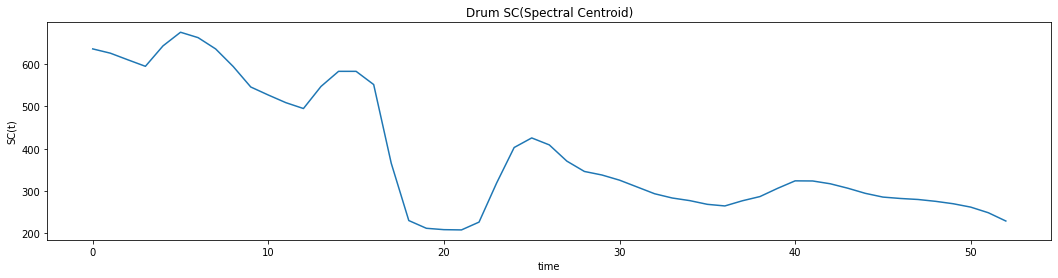

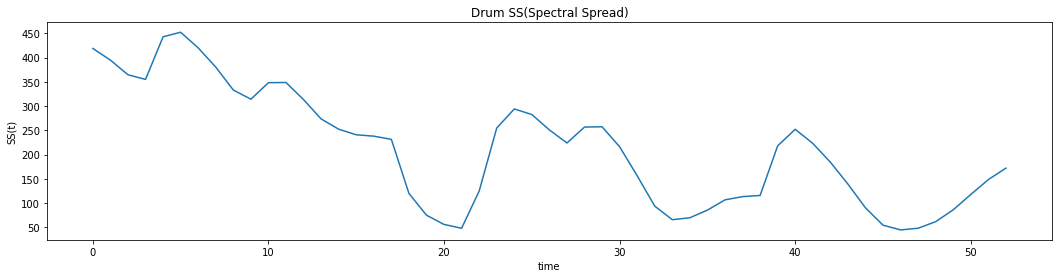

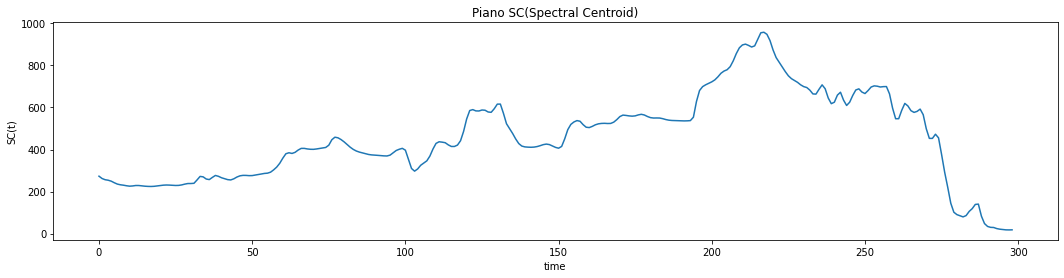

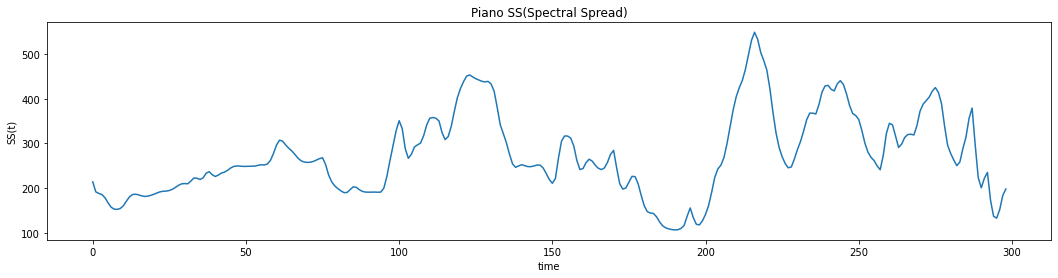

In [46]:
'''
For each sound, compute the spectral centroid and spectral spread for each frame and 
plot the temporal evolution of these values.
'''
# a)
n_fft_drum = int(np.power(2, np.ceil(np.log2(np.abs(int(sr_drum*0.1))))))  # 8192
n_fft_piano = int(np.power(2, np.ceil(np.log2(np.abs(int(sr_drum*0.1))))))  # 8192

spec_drum, phase_drum = librosa.magphase(librosa.stft(drum, n_fft=n_fft_drum, win_length = n_fft_drum, hop_length = int(n_fft_drum - 7*n_fft_drum/8), window='hann'))
spec_piano, phase_drum = librosa.magphase(librosa.stft(piano, n_fft=n_fft_piano, win_length = n_fft_piano, hop_length = int(n_fft_piano - 7*n_fft_piano/8), window='hann'))

nframe_drum = len(spec_drum[0])
nframe_piano = len(spec_piano[0])

fi_drum = np.linspace(0, int(sr_drum/2), int(n_fft_drum/2))
fi_piano = np.linspace(0, int(sr_piano/2), int(n_fft_piano/2))

sc_drum = []
ss_drum = []
sc_piano = []
ss_piano = []

for i in range(0, nframe_drum):
    X_drum = spec_drum[:-1, i]
    sc_drum.append(np.sum(np.multiply(fi_drum,np.power(np.abs(X_drum),2)))/np.sum(np.power(np.abs(X_drum),2)))
    ss_drum.append(np.sqrt(np.sum(np.power(np.subtract(fi_drum,sc_drum[i]),2)*np.power(np.abs(X_drum),2))/np.sum(np.power(np.abs(X_drum),2))))
    
for i in range(0, nframe_piano):
    X_piano = spec_piano[:-1, i]
    sc_piano.append(np.sum(np.multiply(fi_drum,np.power(np.abs(X_piano),2)))/np.sum(np.power(np.abs(X_piano),2)))
    ss_piano.append(np.sqrt(np.sum(np.power(np.subtract(fi_piano,sc_piano[i]),2)*np.power(np.abs(X_piano),2))/np.sum(np.power(np.abs(X_piano),2))))

plt.figure(figsize=(18, 4))
plt.plot(sc_drum)
plt.xlabel('time')
plt.ylabel('SC(Hz)')
plt.title('Drum SC(Spectral Centroid)')
plt.clf

plt.figure(figsize=(18, 4))
plt.plot(ss_drum)
plt.xlabel('time')
plt.ylabel('SS(Hz)')
plt.title('Drum SS(Spectral Spread)')
plt.clf

plt.figure(figsize=(18, 4))
plt.plot(sc_piano)
plt.xlabel('time')
plt.ylabel('SC(Hz)')
plt.title('Piano SC(Spectral Centroid)')
plt.clf

plt.figure(figsize=(18, 4))
plt.plot(ss_piano)
plt.xlabel('time')
plt.ylabel('SS(Hz)')
plt.title('Piano SS(Spectral Spread)')
plt.clf

<function matplotlib.pyplot.clf()>

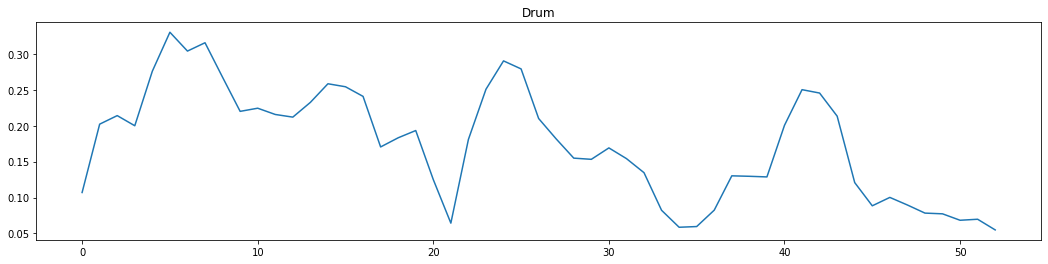

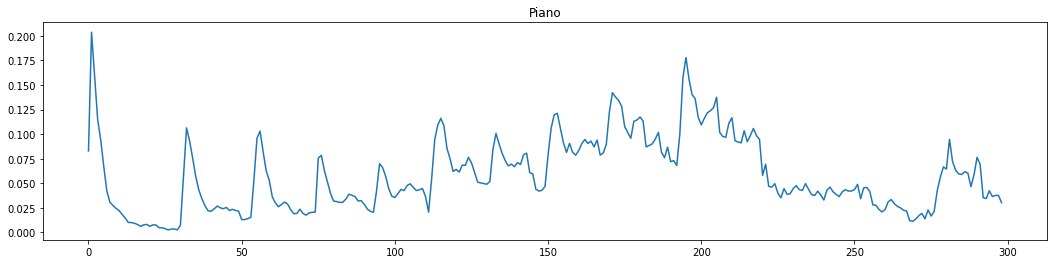

In [43]:
'''
For each sound, compute the spectral flatness measure using a Mel scale. 
Use 40 subbands, each band being 100 Mel wide, up to 4000 Mel. 
Plot a 2-d “sfmgram” using matplotlib.pyplot.imshow.
'''
# b)
bf = [int(700*(np.exp(m*100/1127.01048)-1)) for m in range(41)]  # mel scale bands
nband = len(bf) - 1

bf_idx = []

for i in range(0, nband):
    temp = np.abs(bf[i + 1] - fi_drum)
    bf_idx.append([j for (j, val) in enumerate(temp) if val == np.min(np.abs(bf[i+1]-fi_drum))][0])

n_b = [bf_idx[0]]
for i in range(0,nband-1):
    n_b.append(bf_idx[i+1]-bf_idx[i]+1)

ff = []
for i in range(0, nband):
    if i == 0:
        ff.append(list(range(1, bf_idx[i])))
    else:
        ff.append(list(range(bf_idx[i-1], bf_idx[i])))

sf = np.zeros((len(ff), nframe_drum))
for i in range(0, nframe_drum):
    X = spec_drum[:-1, i]
    for j in range(0, len(ff)):
        sf[j,i] = np.power(np.prod(np.power(np.add(np.abs([X[k] for k in ff[j]]),np.finfo(float).eps),2)),1/n_b[j])/(np.sum(np.power(np.add(np.abs([X[k] for k in ff[j]]),np.finfo(float).eps),2))/n_b[j])
    

sfm = []
for i in range(0, nframe_drum):
    tmp = sf[:, i]
    sfm.append(np.mean(tmp[np.isfinite(tmp)]))

plt.figure(figsize=(18, 4))
plt.title('Drum')
plt.plot(sfm)
plt.clf

sf = np.zeros((len(ff), nframe_piano))
for i in range(0, nframe_piano):
    X = spec_piano[:-1, i]
    for j in range(0, len(ff)):
        sf[j,i] = np.power(np.prod(np.power(np.add(np.abs([X[k] for k in ff[j]]),np.finfo(float).eps),2)),1/n_b[j])/(np.sum(np.power(np.add(np.abs([X[k] for k in ff[j]]),np.finfo(float).eps),2))/n_b[j])
    
sfm = []
for i in range(0, nframe_piano):
    tmp = sf[:, i]
    sfm.append(np.mean(tmp[np.isfinite(tmp)]))

plt.figure(figsize=(18, 4))
plt.title('Piano')
plt.plot(sfm)
plt.clf


<function matplotlib.pyplot.clf()>

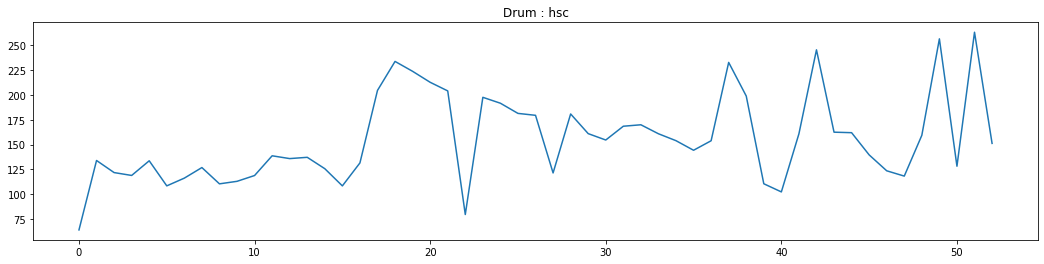

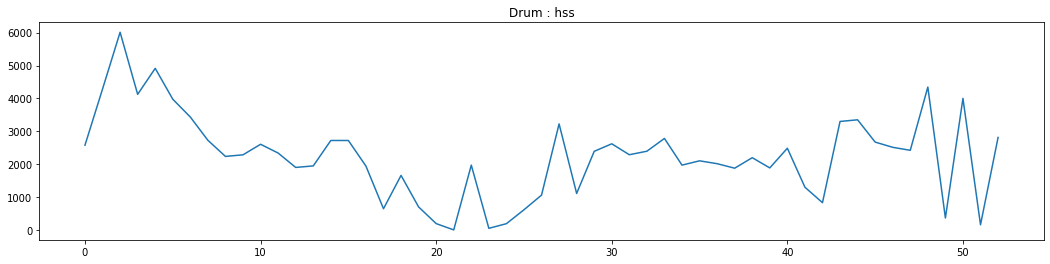

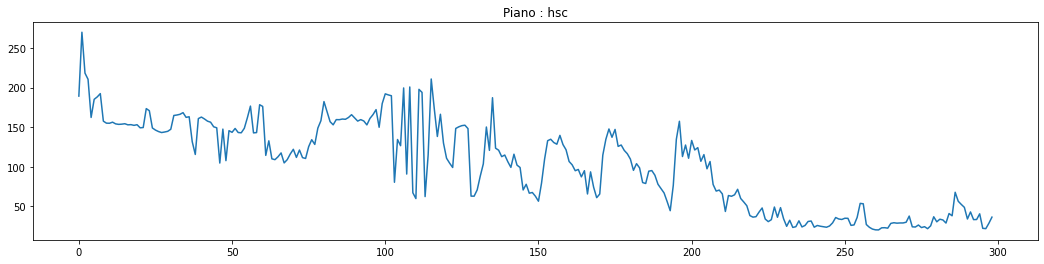

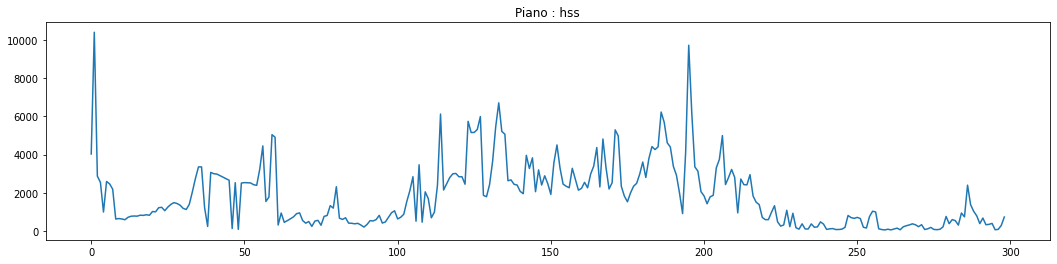

In [55]:
'''
For each sound, find the first 10 spectral peaks in the spectrum, 
and compute the harmonic spectral centroid and harmonic spectral spread. 
Plot the temporal evolution of these values for each signal. 
(Hint: in a magnitude spectrum, if a DFT value is larger than its two neighbors,
it’s considered to be a peak.)
'''
# c)
def is_peak(signal, idx):
    if (signal[idx] > signal[idx - 1]) and (signal[idx] > signal[idx + 1]):
        return True
    else:
        return False

def find_10_peaks(signal):
    peaks = []
    idxes = []
    for i in range(1, len(signal)):
        if len(peaks) == 10:
            return idxes, peaks
        if is_peak(signal, i):
            peaks.append(signal[i])
            idxes.append(i)
            
hsc = []
hss = []

for i in range(0, nframe_drum):
    X_drum = spec_drum[:-1, i]
    idx, peaks = find_10_peaks(X_drum)

    hsc_tmp = 0
    tmp = 0
    
    for j in range(10):
        hsc_tmp += fi_drum[idx[j]] * peaks[j]
        tmp += peaks[j]
    hsc_tmp /= tmp
    
    hss_tmp = 0
    tmp=0
    
    for j in range(10):
        hss_tmp += ((fi_drum[idx[j]] - hsc_tmp) * peaks[j]) ** 2
        tmp += peaks[j] ** 2
    
    hss_tmp /= tmp
    hsc.append(hsc_tmp)
    hss.append(hss_tmp)
    
plt.figure(figsize=(18, 4))
plt.title('Drum : hsc')
plt.plot(hsc)
plt.clf

plt.figure(figsize=(18, 4))
plt.title('Drum : hss')
plt.plot(hss)
plt.clf

hsc = []
hss = []

for i in range(0, nframe_piano):
    X_piano = spec_piano[:-1, i]
    idx, peaks = find_10_peaks(X_piano)

    hsc_tmp = 0
    tmp = 0
    
    for j in range(10):
        hsc_tmp += fi_drum[idx[j]] * peaks[j]
        tmp += peaks[j]
    hsc_tmp /= tmp
    
    hss_tmp = 0
    tmp=0
    
    for j in range(10):
        hss_tmp += ((fi_drum[idx[j]] - hsc_tmp) * peaks[j]) ** 2
        tmp += peaks[j] ** 2
    
    hss_tmp /= tmp
    hsc.append(hsc_tmp)
    hss.append(hss_tmp)
    
plt.figure(figsize=(18, 4))
plt.title('Piano : hsc')
plt.plot(hsc)
plt.clf

plt.figure(figsize=(18, 4))
plt.title('Piano : hss')
plt.plot(hss)
plt.clf



---



2.   Spectral envelope (20 pts)
 
 Using your favorite audio recording/editing software (e.g., Audacity, Logic Pro, smartphone apps, etc.), record your voice saying “My name is (--your name--)” and save it as a wave file.


*   a. Perform spectral analysis of your recorded voice. Plot the spectrogram.
*   b. Take a snapshot from the middle of your spectrogram and plot the magnitude spectrum.
*   c. Using librosa.feature.mfcc, compute the MFCCs of your voice. Take a snapshot in the middle and plot MFCCs using matplotlib.pyplot.bar. Also, plot the spectral envelope overlaid with the original spectrum.

(Hint: librosa.feature.mfcc return the coefficient list every analysis frame, resulting in the 2-d list of coefficients as in a spectrogram. Therefore, you’ll need to select a single frame (e.g. from the middle) for your plotting purposes.)

In [58]:
voice_note_path = './ChangwoonChoi.wav'
voice, sr = librosa.load(voice_note_path, sr=None)
print(sr)
print('My Voice')
ipd.Audio(voice, rate=sr, autoplay=False)

48000
My Voice


(4097, 338)


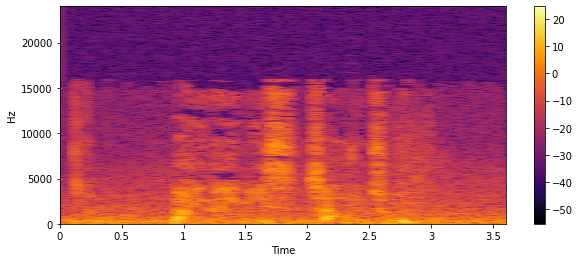

In [94]:
# !!!! your code here !!!!
'''
Perform spectral analysis of your recorded voice. Plot the spectrogram.
'''
# a) Spectrogram
stft = librosa.stft(voice, n_fft=8192, hop_length=512)
spect, _ = librosa.magphase(stft)
print(spect.shape)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spect), sr=sr, hop_length=512, cmap='inferno', x_axis = 'time', y_axis='linear')
plt.colorbar()

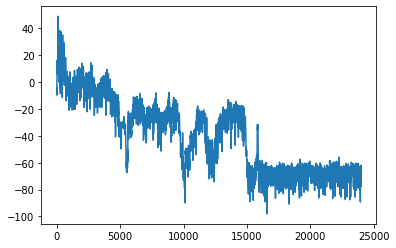

In [98]:
# b) magnitude spectrum
'''
Take a snapshot from the middle of your spectrogram and plot the magnitude spectrum.
'''
t = 119  # middle snapshot time point
X = spect[:,t]
fi = np.arange(0, sr // 2, sr / 8192)
plt.plot(fi, 20 * np.log10(np.abs(X[:4096]) + np.finfo(float).eps))



(20, 338)


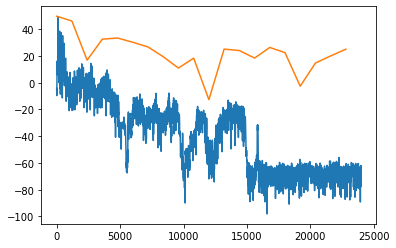

In [102]:
# c) MFCC
'''
Using librosa.feature.mfcc, compute the MFCCs of your voice. 
Take a snapshot in the middle and plot MFCCs using matplotlib.pyplot.bar. 
Also, plot the spectral envelope overlaid with the original spectrum.
'''
X = spect[:,t]
fi = np.arange(0, sr // 2, sr / 8192)
plt.plot(fi, 20 * np.log10(np.abs(X[:4096]) + np.finfo(float).eps))

mfcc = librosa.feature.mfcc(y=voice, sr=sr)
print(mfcc.shape)
mfcc_snapshot = mfcc[:,t]
fi = np.arange(0, sr // 2, sr / 40)
plt.plot(fi, 20 * np.log10(np.abs(mfcc_snapshot[:20]) + np.finfo(float).eps))



---




3.   Constant-Q transform (20 pts)

 Using a sampling rate of 8000 Hz,




*   a. Generate a sequence of sinusoids whose frequencies move from C4 to C5 in a diatonic scale, that is, C4-D4-E4-F4-G4-A4-B4-C5. Each note should be 0.5 second long.
*   b. Using the FFT size of 1024 and the hop size of 512, compute the spectrogram and plot it.
*   c. Using $ f_{min} = 27.5 $ Hz, $ f_{max} = f_{s}/2 $ and, $ B = 12 $ compute and plot the CQ-gram of the same signal.



In [104]:
def sinewave(freq, dur, fs):
    y = np.sin(2 * np.pi * freq * np.arange(0, dur, 1 / fs))
    return y

In [165]:
# !!!! your code here !!!!
'''
Generate a sequence of sinusoids whose frequencies move from C4 to C5 in a diatonic 
scale, that is, C4-D4-E4-F4-G4-A4-B4-C5. Each note should be 0.5 second long.
'''
# a)
fs = 8000
freqs = [262, 293.66, 320.63, 349.228, 391.995, 440, 493.88, 523.25]  # C4 to C5
wave = []
for f in freqs:
    wave.append(sinewave(f, 0.5, fs))

melody = np.concatenate(wave, axis=0)
ipd.Audio(melody, rate=fs, autoplay=False)

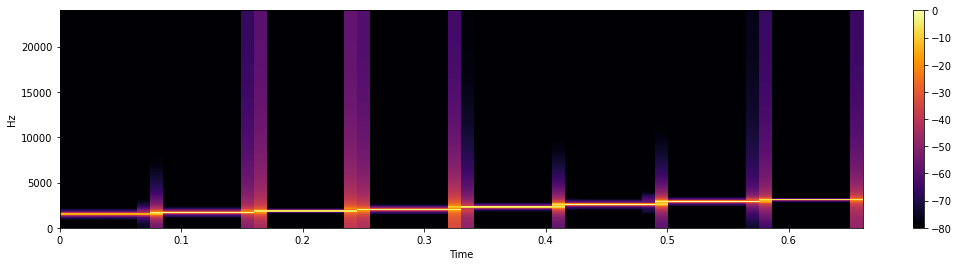

In [166]:
'''
Using the FFT size of 1024 and the hop size of 512, 
compute the spectrogram and plot it.
'''
# b)
n_fft = 1024
hop_length = 512

stft = librosa.stft(melody, n_fft=n_fft, hop_length=hop_length)
spect, _ = librosa.magphase(stft)

hop_num = len(melody) // 512
melody = np.concatenate([melody, np.zeros(1000)], axis=0)
spec = []
for i in range(hop_num):
    X = np.fft.fft(melody[i * 512:i * 512 + n_fft] * np.hanning(n_fft)).reshape((-1, 1))
    spec.append(X)

spec = np.stack(spec, axis=1).reshape(-1, len(spec))
spec = spec[:int(n_fft/2)+1,:]

plt.figure(figsize=(18, 4))
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), sr=sr, hop_length=512, cmap='inferno', x_axis = 'time', y_axis='linear')
plt.colorbar()


In [ ]:
'''
Using  𝑓𝑚𝑖𝑛=27.5  Hz,  𝑓𝑚𝑎𝑥=𝑓𝑠/2  and,  𝐵=12  
compute and plot the CQ-gram of the same signal.
'''
# c)
fmin = 27.5
fmax = fs / 2
B = 12

fk = []
f = fmin
k = 0
while (f < fmax):
    fk.append(f)
    f = (2 ** (k / B)) * fmin
    
N = len(fk)





---



4.   Chromagram (20 pts)



*   a. For the same sequence in the previous problem, compute and plot the chromagram.It is consistent with your expectation?
*   b. Download prelude_cmaj_short_11k.wav from the class homepage. Compute and plot the chromagram. By visual inspection, try to estimate the chord sequence (Hint: there are three different kinds of chords, each repeating twice like A-A-B-B-C-C-A-A).





In [ ]:
# !!!! your code here !!!!
